# 1. Fundamentals

## PyTorch: ZeroToAll

These notebooks goes over my implementation of [Sung Kim's PyTorch:ZeroToAll](https://www.youtube.com/watch?v=SKq-pmkekTk&list=PLlMkM4tgfjnJ3I-dbhO9JTw7gNty6o_2m&index=1) video lecture series from YouTube.
  
The goal of this project is to learn while teaching; while I fully recommend going through his videos and original repository, I believe that writing updated code in my own manner can be useful for anyone new to PyTorch and machine learning. I will try to explain what is going on to the best of my ability, but expect a the reader to already understand basic calculus, linear algebra, and programming.

## 2. Linear Model

__Linear Model__  
We begin by building a simple, linear model $\vec{y} = x^{T}w$.
  
For this, we use a makeshift dataset of the form $y = 2*x + e$. Note that the x and y are $"nx1"$ dimensions, meaning we only have 1 predictor variable (as opposed to x being a matrix). The $e$ represents intentional perturbations from a Normal distribution.

__Building a Model__  
Bulding a model means finding its parameters, $w$.  
We designed our problem for the "correct" parameter to be 2. However, how could we have found this value if we were only given data? Here is how:
  
1. We choose a model  $\vec{y} = x^{T}w$  
2. We choose a loss function $L = \frac{1}{n}\sum_{i=0}^{n}(y_{actual}-y_{pred})^{2}$  
3. Iterative to minimize $L$  
  
Note that $y_{pred} = \vec{y} = x^{T}w$ and $n$ is the number of data rows, or observations. Therefore, we actually know each of the values based on our model and data.

In [1]:
# Dependencies
import numpy as np              # Numerical Python library
import matplotlib.pyplot as plt # Plotting library

In [2]:
# Training Data
x_data = np.array(range(0,10))
y_data = np.array([2*x + np.random.normal(0, 0.1) for x in x_data]) # Add Normal perturbation

In [3]:
# Forward Linear Model
def forward(w, x):
    return(x*w)

In [4]:
# Sum of Squares Loss
def loss(w, x, y):
    y_pred = forward(w, x)
    l = np.square((y - y_pred)) # Loss per data prediction
    return(l)

In [5]:
# Explore MSE using w
# Store values
mse_list = []
w_list = np.arange(0.0, 4.1, 0.1)

# Try out each value of w
for w in w_list:
    l_sum=0
    
    # Calculate total model loss for w
    for x_val, y_val in zip(x_data, y_data):
        l = loss(w, x_val, y_val)
        l_sum += l
    mse = l_sum/len(y_data)
    mse_list.append(mse)

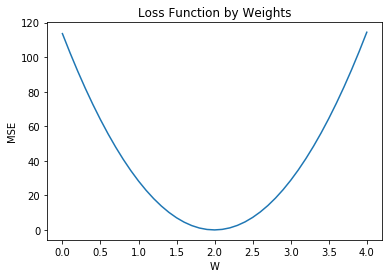

W providing minimum Loss:  2.0


In [6]:
# Loss vs W
plt.title("Loss Function by Weights")
plt.plot(w_list, mse_list)
plt.xlabel('W')
plt.ylabel('MSE')
plt.show()

print("W providing minimum Loss: ",w_list[np.argmin(mse_list)])

For each w that we tried, the smallest loss happens when $w = 2$, which is how we built our data to be. We were able to do this with knowing only the model's general form, the data values, and a loss function. 
  
However, this process was very inefficient. We chose a random domain space for our parameter $w$, and then found the loss for all of them at every data point. What if our domain was off? And once we find a good estimate for $w$, can we stop? 

## 3. Gradient Descent

__Gradient Descent__  
Gradient Descent is an optimization algorithm that moves towards a direction of increase or decrease. Using the idea of a derivative outputing the direction of change, we can move a "step" in that direction until we reach convergence.  
  
Also, we decide how much to move in that direction using a parameter called "alpha", $\alpha$. This makes sure that we converge fast enough by not taking miniscule steps, but also so that we do not pass the minimal value and iterate further away.
  
__GD on MSE__  
Looking at our visualization in Part 2, we can see how our loss function is always concave. Algebraically, this makes sense since we are just looking at a function of the form $L(w) = (y - w*x)^{2}$.  
  
So, we know that the gradient can show us the direction of decrease at a point, and that the function has a single minimum value for all values w. Essentially, this means that we can continue moving in that direction until we are arbitrarily satisfied with our newfound weight, $w$.
  
__Algorithm__  
Iterate:  
$w_{n+1} = w_{n} - \alpha \nabla f(w)$  
- $\nabla L = \frac{dL}{dw}$  
- $\frac{dL}{dw} = 2*x*(y_{actual} - x*w)$

In [7]:
# Gradient Descent: One Step
def gradient(w, x, y, alpha=1):
    
    # forward function, f
    f = forward(w, x)
    
    # w_new = w_old - dL/dw (move in direction of negative loss)
    g = 2*x*alpha*(f - y)
    return(g)

__When are we finished?__  
We can iterate through this process as many times as we would like. However, it takes time to compute through this algorithm. A typical way is to keep iterating until our change in loss reaches a specific threshold. We often also place a limiting number of iterations to save time, in case we do not reach that threshold in a reasonable amount of time. For this example, we use a limiter of 100 and do not apply a threshold.

In [8]:
# MSE, w = 0
loss_pre = loss(0, x_data, y_data)
print(np.mean(loss_pre))

113.62136476937069


In [9]:
# MSE, w = 0, 100 iterations
w = 0
alpha = 0.001

# Store values
loss_list = []
w_list = []

# Iterate 100 times
for epoch in range(100):
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):     # w changes for each value (x_val, y_val)
        alpha_grad = gradient(w, x_val, y_val, alpha)
        w = w - alpha_grad
        l = loss(w, x_val, y_val)
        l_sum += l
    #print(f'Epoch: {epoch}, Loss = {l}')
    mse = l_sum/len(x_data)
    w_list.append(w)                             # store total loss of that total run through
    loss_list.append(mse)

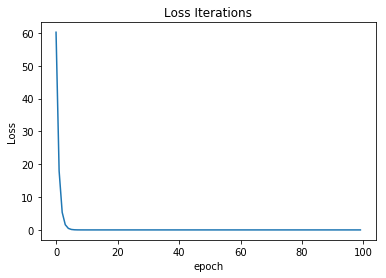

Final weight value: 
w = 1.9975088586174297 

Final loss value:
mse=  0.0022309840312936093


In [11]:
# Plot Loss vs Iterations
plt.plot(loss_list)
plt.title('Loss Iterations')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.show()
print("Final weight value: \nw =", w, "\n\nFinal loss value:\nmse= ", loss_list[-1]/len(y_data))

__Results__  
Apparently, the algorithm found a great value for w with very few iterations!
  
__Notes__  
If our data set were much bigger, we can alter the GD algorithm to only use a sample of the total data set in each iteration. This is called Stochastic Gradient Descent, and is popular in real life.
  
__LIMITATION__  
Gradient Descent relies on knowing the loss function and being able to compute it manually, as we did when we implemented our gradient() function. Sometimes, this is not possible. Not only is it too difficult to solve manually, there may be too many when forming multiple layers of a neural network.

## 4. Back Propogation

Back Propogation works by splitting up our computations, examining the results of each, and using a system of substitutions to calculate the partial derivative at each one. This allows us to find the derivatives at each point and thus apply gradient descent to the Loss.

We have $L = (y_{actual} - y_{pred})^2$ meaning we have 3 computational 'gates': a multiplication forward pass, a minus, and then a square. Substituting in all of the variables in our forward function we get: 
  
L = (w * x - y) ^2
  
Splitting each computation as a function, and thus creating a succession of linear transformations, we can break it up using chain rule to calculate the gradient of loss with respect to the weight.  
The name 'Back Propogation' comes from calculating forwards first to find our loss, then using it to go backwards to fill in our derivatives until we have all of our pieces to get the gradient.

In [12]:
# Forward
x_val = 1
w = 1
y_val = 2

yhat = w*x_val        # forward
s = yhat - y_val      # intermediate step
l = np.square(s)  # loss
print(f'x = {x_val}\nw = {w}\ny = {y_val}\nLoss of {l}')

x = 1
w = 1
y = 2
Loss of 1


In [13]:
# Back Propogation
## Goal is to find dl/dw, since optimizing on loss to find weight
## dl/dw = dyl/dyhat * dyhat / dw

dl_ds = 2*s      # dl/ds = ds^2/ds = 2s
ds_dyhat = 1     # ds/dyhat = d(yhat-y)/dyhat = 1 - 0
dyhat_dw = x_val # dwx/dw

In [14]:
# Gradient Calculation
dl_dw = dl_ds*ds_dyhat*dyhat_dw
grad = dl_dw

In [15]:
# Back Prop Function
def back_prop(w, x, y, loss=False):
    # forward
    y_ = w*x
    s = y_ - y
    l = np.square(s)
    
    # chain rule backward
    dl_ds = 2*s
    ds_dy_ = 1
    dy__dw = x
    grad = dl_ds*ds_dy_*dy__dw
    
    # can return loss
    if loss:
        grad = (grad, l)
    return(grad)

In [16]:
# Back Prop vs Gradient Step
(w, x, y) = (1, 2, 4)
back_prop(w, x, y) == gradient(w, x, y) # alpha=1 by default

True

### Summary

This notebook went over building a linear model and using both gradient descent and back propogation to find the minimum of a sum of squares loss function with respect to the weight. The implementations in this are straightforward enough, but a lot of these computations become increasingly complex as our data set changes. In Part 2, we begin using the PyTorch library.